(a) State the number of training samples. Also, state the number of test samples.
 No. Training Samples - 8143 No. Test Samples - 9752

(b) Run a simulation using TensorFlow and vary the number of hidden units and make a plot.

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
testdata = pd.read_csv('testData.txt', sep=',')
traindata = pd.read_csv('trainData.txt', sep=',')

testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [32]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [33]:
X = traindata.iloc[:5000, 1:6]
Y = testdata.iloc[:5000, -1:]

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)

(4000, 5) (4000, 1) (1000, 5) (1000, 1)


In [40]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [56]:
fitmodel = model.fit(train_x, train_y, epochs=10, validation_split=0.3)

Epoch 1/10
88/88 [==============================] - 0s 4ms/step - loss: 0.3905 - accuracy: 0.8329 - val_loss: 0.3817 - val_accuracy: 0.8458
Epoch 2/10
88/88 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8339 - val_loss: 0.3933 - val_accuracy: 0.8383
Epoch 3/10
88/88 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.8404 - val_loss: 0.3713 - val_accuracy: 0.8542
Epoch 4/10
88/88 [==============================] - 0s 4ms/step - loss: 0.3869 - accuracy: 0.8339 - val_loss: 0.3776 - val_accuracy: 0.8308
Epoch 5/10
88/88 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8404 - val_loss: 0.3680 - val_accuracy: 0.8675
Epoch 6/10
88/88 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.8157 - val_loss: 0.3640 - val_accuracy: 0.8275
Epoch 7/10
88/88 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.8164 - val_loss: 0.3929 - val_accuracy: 0.8000
Epoch 8/10
88/88 [==

In [44]:
training_loss, training_acc = model.evaluate(train_x, train_y)
testing_loss, testing_acc = model.evaluate(test_x, test_y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8220


In [45]:
pred = model.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 914us/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/10
88/88 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8418 - val_loss: 0.6127 - val_accuracy: 0.8075
Epoch 2/10
88/88 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8296 - val_loss: 0.5412 - val_accuracy: 0.8083
Epoch 3/10
88/88 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.8207 - val_loss: 0.6336 - val_accuracy: 0.7633
Epoch 4/10
88/88 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8414 - val_loss: 0.6010 - val_accuracy: 0.7833
Epoch 5/10
88/88 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.8275 - val_loss: 0.3922 - val_accuracy: 0.8450
Epoch 6/10
88/88 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8393 - val_loss: 0.4925 - val_accuracy: 0.8050
Epoch 7/10
88/88 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8275 - val_loss: 0.4404 - val_accuracy: 0.8133
Epoch 8/10
88/88 [==

Text(0, 0.5, 'Accuracy')

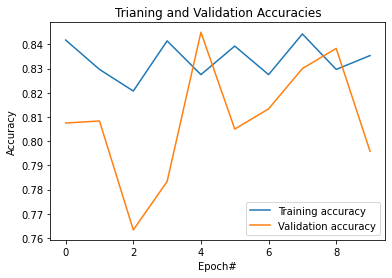

In [57]:
fitModel = model.fit(train_x, train_y, epochs = 10, validation_split = 0.3)


plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

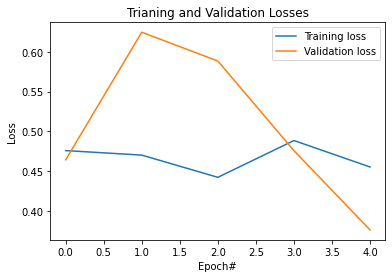

In [14]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')

(c) Discuss (interpret) the results.


It has 1 Input 1 Hidden and 1 Output with the accuracy of 82%

In [58]:
test_predict = model2.predict(test_x)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = test_y, predictions = test_predict_labels)
print('confusion Matrix\n', confusion_matrix)


32/32 [==============================] - 0s 1ms/step
confusion Matrix
 tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


(d) Add a second hidden layer, and train a few architectures with 2 hidden layers. Report what
architectures you tried (expressed as 5-h1-h2-1, i.e., 5 input, h1 hidden in first layer, h2 hidden
in second layer, and one output unit),

Adding one more hidden layer - 5 Input, Hidden Layer1, Hidden Layer2 and one output

In [59]:
model2 = tf.keras.Sequential()
model2.add(Dense(16, activation='relu',input_shape=(5, ))) 
model2.add(Dense(32, activation='softplus'))
model2.add(Dense(32, activation='softplus')) 
model2.add(Dense(1, activation='sigmoid')) 

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                96        
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [50]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model2.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [51]:
fitmodel = model2.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 3.6715 - accuracy: 0.7211 - val_loss: 0.5856 - val_accuracy: 0.7517
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.7843 - val_loss: 0.5178 - val_accuracy: 0.7433
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7804 - val_loss: 0.7880 - val_accuracy: 0.6208
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.7743 - val_loss: 0.5066 - val_accuracy: 0.7992
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7989 - val_loss: 0.6190 - val_accuracy: 0.6933


In [52]:
training_loss, training_acc = model2.evaluate(train_x, train_y)
testing_loss, testing_acc = model2.evaluate(test_x, test_y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6361 - accuracy: 0.6830


In [53]:
pred = model2.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 955us/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.7957 - val_loss: 0.4826 - val_accuracy: 0.8067
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.8096 - val_loss: 0.4538 - val_accuracy: 0.7842
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.7954 - val_loss: 0.9428 - val_accuracy: 0.8017
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7846 - val_loss: 0.4398 - val_accuracy: 0.8075
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.8054 - val_loss: 0.6249 - val_accuracy: 0.6975


Text(0, 0.5, 'Accuracy')

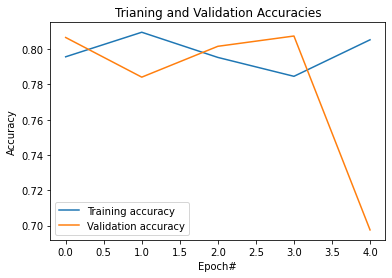

In [54]:
fitModel = model2.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

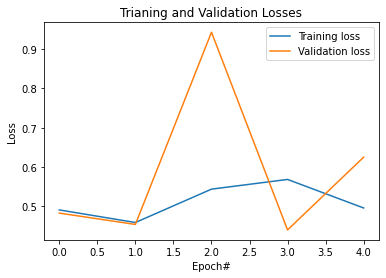

In [55]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')